In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


Define model

In [2]:
model_path = './frozen_base/frozen_graph.pb'
model_path = './frozen_pruned/frozen_graph.pb'

Define a test image.

In [3]:
test_img_path = "PetImages/Cat/6779.jpg"
#test_img_path = "PetImages/Cat/38.jpg"

This image is 93.38 percent cat and 6.62 percent dog.


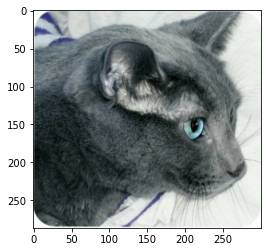

In [4]:
# Load a model imported from Tensorflow

tensorflowNet = cv2.dnn.readNetFromTensorflow(model_path)
img = cv2.imread(test_img_path)

plt.imshow(img)

img = img/255.
img = img.astype('float32')


# Use the given image as input, which needs to be blob(s).
tensorflowNet.setInput(cv2.dnn.blobFromImage(img, size=(180, 180), swapRB=True, crop=False))


# Runs a forward pass to compute the net output
networkOutput = tensorflowNet.forward()

score = networkOutput[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

In [5]:
#This image is 95.05 percent cat and 4.95 percent dog.
#This image is 93.38 percent cat and 6.62 percent dog.